# Inversion and Optimisation <a class="tocSkip">

## Lecture 1 <a class="tocSkip">
    
### Homework Exercises - Solutions <a class="tocSkip">

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from pprint import pprint
import scipy.interpolate as si
from mpl_toolkits.mplot3d import Axes3D

# Homework

## Homework - Optimisation - simple example

Consider the problem
$$ 
f(\boldsymbol{x}) = 
1+2x + 4y + x^2+2xy+3y^2
$$

Compute the gradient vector, and by setting it equal to zero and writing as a matrix equation,
solve for the stationary point. Plot the function via a contour plot in 2D, and add the stationay point you've computed to verify it is indeed a minima (refer to the image from the lecture).

We will have a more detailed look at _quadratic optimisation_ in tomorrow's lecture.

### Solution 

The gradient vector is

$$\nabla f= 
\begin{pmatrix}
2 + 2x + 2y\\
4 + 2x + 6y
\end{pmatrix}
$$

We can write this in matrix form:

$$
\begin{pmatrix}
2 & 2\\
2 & 6
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
+
\begin{pmatrix}
2\\
4
\end{pmatrix}
$$

So $\nabla f = 0$ when 

$$
\begin{pmatrix}
2 & 2\\
2 & 6
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
=
\begin{pmatrix}
-2\\
-4
\end{pmatrix}
$$

Let's use a contour plot to visualise the function in 2D, solve for the minimum (the stationary point)

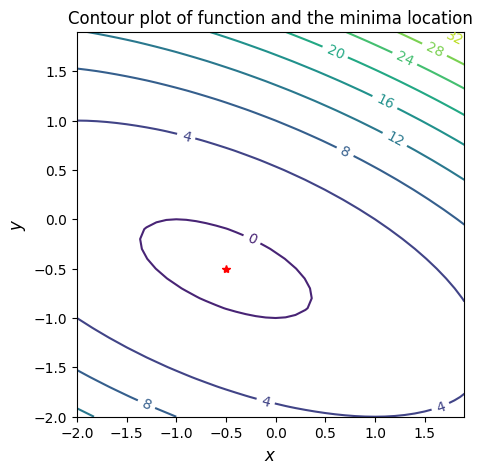

In [3]:
dx = 0.1
x = np.arange(-2.0, 2.0, dx)
y = np.arange(-2.0, 2.0, dx)
X, Y = np.meshgrid(x, y)
f = 1. + 2.*X + 4.*Y + X**2 + 2.*X*Y + 3.*Y**2 

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

cs = ax1.contour(X, Y, f, 10)
ax1.clabel(cs, inline=1, fontsize=10)
ax1.set_title('Contour plot of function and the minima location')
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$y$', fontsize=12)

# solve the linear system for x,y
A = np.array([[2,2],[2,6]])
b = np.array([-2,-4])
x = sl.solve(A,b)
ax1.plot(x[0],x[1],'r*')
#plt.savefig('simple_optimisation.png')

## Homework - $2\times 2$ linear systems

Recall from the lecture the system

\begin{eqnarray*}
  2x + 3y &=& 7 \\[5pt]
   x - 4y &=& 3,
\end{eqnarray*} 

and the following plot which demonstrated a unique solution.

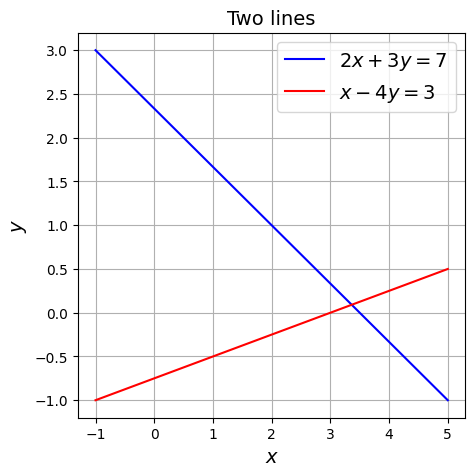

In [4]:
# unique solution
x = np.linspace(-1,5,100)
y1 = -(2./3.)*x + (7./3.)
y2 = (1./4.)*x - (3./4.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=7$')
ax1.plot(x,y2,'r', label='$x-4y=3$')

ax1.legend(loc='best', fontsize=14);

This was also used as an example in _Computational Mathematics_, where you were asked what other situations are possible and to construct examples and the corresponding plots. As a quick reminder to yourself, plot the following two cases, and explain the results in terms of **existence** and **uniqueness** covered in the lecture.

$$
\left(
  \begin{array}{rr}
    2 & 3 \\
    4 & 6 
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y
  \end{array}
\right) = \left(
  \begin{array}{c}
    4 \\
    8
  \end{array}
\right),
$$

and

$$
\left(
  \begin{array}{rr}
    2 & 3 \\
    4 & 6 
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y
  \end{array}
\right) = \left(
  \begin{array}{c}
    4 \\
    7
  \end{array}
\right),
$$.

### Solution 

Consider the problem

$$
\left(
  \begin{array}{rr}
    2 & 3 \\
    4 & 6 
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y
  \end{array}
\right) = \left(
  \begin{array}{c}
    4 \\
    8
  \end{array}
\right),
$$

where the matrix on the LHS clearly has a zero determinant.

Considering now the values in the RHS vector as well, the second equation is simply twice the first, and hence a solution to the first equation is also automatically a solution to the second equation. 

If we think geometrically, and interpret the two equations as constraints, they are **both** constraining our $x,y$ values to the same 1D subspace - any solution along this line in 2D satisfies **both** equations, and hence any of them is a solution to our linear system.

We hence only have one *linearly-independent* equation here, and our problem is under-constrained: we effectively only have one equation for two unknowns and this problem has *infinitely many* possibly solutions.

In terms of the terminology of today's lecture: the rank of the matrix is 1 which is smaller than the number of rows $m$ (in this case $m=n$) and therefore the solution is not **unique**.

The rank of 1 is also smaller than the number of columns $n$, which means that we do not have **existence** of a solution for _every_ right-hand side. Here however we happen to have chosen a right-hand side that is consistent with the equations.

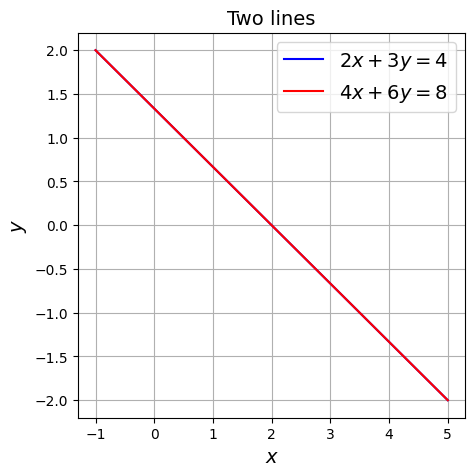

In [5]:
# consider the following situation
x = np.linspace(-1,5,100)
y1 = -(2./3.)*x + (4./3.)
y2 = -(4./6.)*x + (8./6.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=4$')
ax1.plot(x,y2,'r', label='$4x+6y=8$')

ax1.legend(loc='best', fontsize=14);

If we instead replaced the RHS vector with $(4,7)^T$, then the two equations would now be contradictory: in this case we have *no solutions*, or **non-existence**.

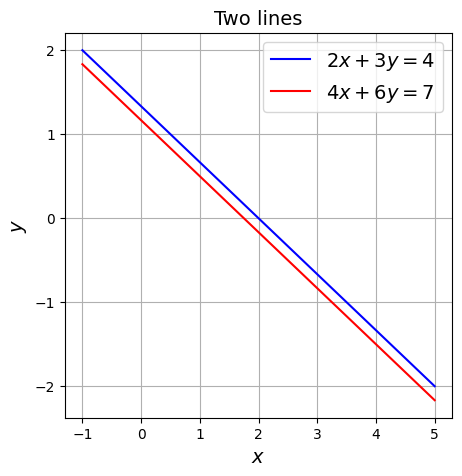

In [6]:
# consider the following situation
x = np.linspace(-1,5,100)
y1 = -(2./3.)*x + (4./3.)
y2 = -(4./6.)*x + (7./6.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=4$')
ax1.plot(x,y2,'r', label='$4x+6y=7$')

ax1.legend(loc='best', fontsize=14);

## Homework - Differentiation of inner products 

This is a result that we will use frequently in tomorrow's and further lectures, so it is a good idea to make sure you understand where it comes from:

Suppose that $\boldsymbol{a}$ and $\boldsymbol{b}$ are both functions of $\boldsymbol{x}$. Suppose $\boldsymbol{a}$ and $\boldsymbol{b}$ are vectors of length $m$, and $\boldsymbol{x}$ are vectors of length $n$.

What is

$$\frac{\partial}{\partial \boldsymbol{x}} \left(\boldsymbol{a}^T\boldsymbol{b}\right)$$

First note the object inside the bracket is the inner (or dot) product of the two vectors, and so is itself a scalar.

The derivative (or gradient) w.r.t. $\boldsymbol{x}$ is a vector the same length as $\boldsymbol{x}$.

The answer (if you work it out component by component) is

$$\frac{\partial}{\partial \boldsymbol{x}} \left(\boldsymbol{a}^T\boldsymbol{b}\right) 
=\left(\frac{\partial \boldsymbol{a}}{\partial \boldsymbol{x}}\right)^T\boldsymbol{b} +
\left(\frac{\partial \boldsymbol{b}}{\partial \boldsymbol{x}}\right)^T\boldsymbol{a}$$

The differentials $\partial \boldsymbol{a}/\partial \boldsymbol{x}$ and  $\partial \boldsymbol{b}/\partial \boldsymbol{x}$ are both $m\times n$ matrices, so that their transposes are $n\times m$. 

Thus the products 
$(\partial \boldsymbol{a}/\partial \boldsymbol{x})^T \boldsymbol{b}$ and  $(\partial \boldsymbol{b}/\partial \boldsymbol{x})^T \boldsymbol{a}$
are both column vectors of length $n$ as 
required.    Note  that  it  does  not  matter  if  we  differentiate  a  vector  and  then  transpose  the 
result, or if we transpose the vector before differentiation - both generate the same outcome. 

Try to prove, or work through an example to convince yourself that this is correct

### Solution

<https://proofwiki.org/wiki/Derivative_of_Dot_Product_of_Vector-Valued_Functions>

## Homework - Gaussian Elimination
Use Gaussian Elimination with back substitution to solve the following system of equations

\begin{align*}
  x + y + z = 5 \\
  2x - z = 4 \\
  3y + z = 2
\end{align*}

Check your answer by substituing it back into the original equations!

### Solution
In augmented form this system looks like
$$
\begin{pmatrix}
  1 & 1 & 1 & 5 \\
  2 & 0 & -1 & 4 \\
  0 &3 & 1 & 2
\end{pmatrix}
$$

We start by subtracting the first row, multiplied by 2, from the second to eliminate the 1 in $a_{21}$:

$$
\begin{pmatrix}
  1 & 1 & 1 & 5 \\
  0 & -2 & -3 & -6 \\
  0 &3 & 1 & 2
\end{pmatrix}
$$

The $a_{31}$ is already zero, so we can move on to the second column and eliminate $a_{32}$ by adding $3/2$ times the second row to the third row:

$$
\begin{pmatrix}
  1 & 1 & 1 & 5 \\
  0 & -2 & -3 & -6 \\
  0 & 0 & -3\tfrac 12 & -7
\end{pmatrix}
$$

Now we're already in upper diagonal form, so we can use back substitution to obtain the solution. From the last equation, we immediately get:

$$
  -3\tfrac 12~z = -7 \quad\rightarrow\quad z=2
$$

Then we can use this value of $z$ to substitute in the second equation, and solve $y$:

$$
  -2y -3z = -6 \quad\rightarrow\quad -2y -6 = -6 \quad\rightarrow\quad y=0
$$

And finally, using the values of $y$ and $z$ we can solve the first equation for $x$:

$$
  x + y + z = 5 \quad\rightarrow\quad x + 0 + 2 = 5 \quad\rightarrow\quad x = 3
$$

which we can easily check to satisfy the original equations.

## Homework - partial pivotting
Solve, analytically, the following system of equations from the lecture notes using Gaussian Elimination with partial pivotting (assuming $\epsilon$ is much smaller than 1):

\begin{align*}
\epsilon x_1 + x_2 = 1 \\
x_1 + x_2 = 2
\end{align*}

Using this method, derive expressions for $x_1$ and $x_2$ in terms of $\epsilon$ without trying to further simplify.
Check that, if you implement these expressions in code, they satisfy the equations even for very small $\epsilon$.

Do these same expressions still work if $\epsilon$ is very large? Why not?

### Solution
The augmented form is given by

$$
\begin{array}{cc|c}
  \epsilon & 1 & 1 \\
  1 & 1 & 2
\end{array}
$$

If we would use standard Gaussian Elimination without partial pivotting, as we did in the lecture, we would use $\epsilon$ as a pivot and subtract the first row multiplied by $1/\epsilon$ from the second. With partial pivotting however, we check, in the column below the pivot, if there are any values that are larger than the pivot, and if so swap with that row. Here, we find that the 1 in the first column of the second row is larger than $\epsilon$, so we swap the second and first row

$$
\begin{array}{cc|c}
  1 & 1 & 2 \\
  \epsilon & 1 & 1
\end{array}
$$

Now $1$ is the pivot and we subtract the new first row, multiplied by $\epsilon$ from the new second row:

$$
\begin{array}{cc|c}
  1 & 1 & 2 \\
  0 & 1-\epsilon & 1-2\epsilon
\end{array}
$$

This is now in upper diagonal form, and we can obtain the solution through back-subtitution:

$$
  (1-\epsilon) x_2 = 1-2\epsilon \quad\rightarrow\quad x_2 = \frac{1-2\epsilon}{1-\epsilon}
$$

and

$$
  x_1 + x_2 = 2 \quad\rightarrow\quad x_1 + \frac{1-2\epsilon}{1-\epsilon} = 2
  \quad\rightarrow\quad x_1 = 2 - \frac{1-2\epsilon}{1-\epsilon}
$$

Let's check this answer with a similar piece of code as in the lecture notes:

In [12]:
eps = 1e-20
A = np.array([[eps, 1],[1,1]])
b = np.array([1,2])
x2 = (1-2*eps)/(1-eps)
x1 = 2 - x2
x = np.array([x1,x2])
print(x)
# check that the LHS Ax is the same as the RHS b
if not np.allclose(A@x, b):
    print("Solution is incorrect!")


[1. 1.]


It appears the solution is indeed stable for very small $\epsilon$. If we try a large value $\epsilon$ however, say `eps=1e20` you will see the solution fails again. This is because now $\epsilon$ is actually the larger pivot, so we should not have swapped the rows in the Gaussian Elimination.

## Homework - Row operations on an over-determined problem

Consider the following example

$$
\begin{align*}
  2x + 3y &= 7 \\[5pt]
   x - 4y &= 3 \\[5pt]
  -3x - 10y & = -11
\end{align*}
   \quad \iff \quad
  \begin{pmatrix}
    2 & 3 \\
    1 & -4  \\
    -3 & -10 
  \end{pmatrix}
  \begin{pmatrix}
    x \\
    y 
  \end{pmatrix}=
  \begin{pmatrix}
    7 \\
    3 \\
    -11
  \end{pmatrix}   
$$

Use row operations on the augmented system in an attempt to solve this problem.

<br>

In doing this you will be able to also establish the rank of $A$.

What does the rank say about **existence** and **uniqueness** of solutions for this case?

By changing the right-hand side can you create a case where the solution does not exist?

### Solution

For the augmented system

$$
[A \, | \, \boldsymbol{b}] = 
\left[
  \begin{array}{rr|r}
    2 & 3 & 7\\
    1 & -4 & 3 \\
    -3 & -10 & -11 
  \end{array}
\right]
$$

Swap rows as an easy way to get a "1" top left

$$
\left[
  \begin{array}{rr|r}
    1 & -4 & 3 \\
    2 & 3 & 7\\
    -3 & -10 & -11 
  \end{array}
\right]
$$

use the "1" to set the values below to "0"

$$
\left[
  \begin{array}{rr|r}
    1 & -4 & 3 \\
    0 & 11 & 1\\
    0 & -22 & -2 
  \end{array}
\right]
$$

Now scale a row to get a "1" as the leading entry of the next row

$$
\left[
  \begin{array}{rr|r}
    1 & -4 & 3 \\
    0 & 1 & 1/11\\
    0 & -1 & -1/11 
  \end{array}
\right]
$$

use if to set entries above and below to zero

$$
\left[
  \begin{array}{rr|r}
    1 & 0 & 3+4/11 \\
    0 & 1 & 1/11\\
    0 & 0 & 0 
  \end{array}
\right]
$$

and so this problem has the unique solution $ x = 3+4/11 = 37/11$ and $y = 1/11$.

We can also see that the rank of the matrix is 2, the same as the number of columns $n$, which indeed guarantees uniqueness because we have sufficient independent equations to constrain the $n$ unknowns in $\bf x$.

The rank is smaller than the number of equations, meaning that the rows of the matrix are not linearly independent and we only get a solution if the right-hand side is consistent. If you change any one of the three coefficients on the right-hand side, and repeat the Gaussian elimination process you will see that you will still end up with zeros in the first two entries of the last row of the augmented matrix, because these correspond to entries of the matrix which is the same as before, but the final entry (let's call it $\hat{b}_3$) is now nonzero, which means that we cannot satisfy the final equation:

$$
  0x+0y = \hat{b}_3 \neq 0 \rightarrow \text{  contradiction   }
$$

## Homework - A trivial over-determined case

In the lecture and above we considered the simple case of three equations, two unknowns.

Of course there is an even simpler case - two-equations, one unknown.

An example might be

$$
\begin{align*}
  2x &= 8 \\[5pt]
   3x &= 9
\end{align*}
   \quad \iff \quad
  \begin{pmatrix}
    2 \\[5pt]
    3
  \end{pmatrix}
  \begin{pmatrix}
    x 
  \end{pmatrix}=
  \begin{pmatrix}
    8 \\
    9 
  \end{pmatrix}   
$$

Does this have a solution?

No clearly not. What solution does the least square approach return?

### Solution

Let's do it by hand and then with code.

The least squares solution will minimise the quantity $\| A\boldsymbol{x} - \boldsymbol{b}\|_2$, 

i.e. here (squaring for simplicity), that minimises

$$
\left\| 
\begin{align*}
  2x - 8 \\[5pt]
   3x - 9
\end{align*}
\right\|_2^2
 = { (2x - 8)^2 + (3x - 9)^2 }
$$

This is equal to 

$$ (4 x^2  -32 x + 64) + (9 x^2  -54 x + 81) = 13 x^2  -86 x +  145 $$

to find the $x$ that minimises this let's differentiate and set to zero:

$$26 x - 86 = 0 \Rightarrow x = 86/26 = 43/13$$

<br>

Now let's compute by hand what the least squares implementation from the lecture does, i.e. solve 

$$A^TA\boldsymbol{x} = A^T\boldsymbol{b}$$

Here 

$$ A^TA = (2, 3) 
  \begin{pmatrix}
  2 \\[5pt]
   3
  \end{pmatrix}
 = 13
 $$
 
 and
 
$$A^T\boldsymbol{b} = (2,3)
  \begin{pmatrix}
  8 \\[5pt]
   9
  \end{pmatrix}
= 43$$

and so this also produces $ x = 43/13$.

Let's implement in code and check we get the same answer.

In [7]:
A = np.array([ [2], [3] ])
b = np.array([ [8], [9] ])
# Form the matrix A.T @ A
ATA = A.T @ A  

# Form the RHS vector:
rhs = A.T @ b

# solve the system
ls_sol = sl.solve(ATA, rhs)

print(ls_sol, 43/13)

[[3.30769231]] 3.3076923076923075


## Homework - Outer-product

Compute the outer-product ($\boldsymbol{a}\boldsymbol{b}^T$) of the column vectors

$$\boldsymbol{a} = 
\begin{pmatrix}
1 \\
2\\
3 
\end{pmatrix}, 
\qquad
\boldsymbol{b} = 
\begin{pmatrix}
4 \\
5\\
6 
\end{pmatrix}.
$$

**Note** the difference between the outer product $\boldsymbol{a}\boldsymbol{b}^T$ which results in a matrix, and the inner product $\boldsymbol{a}^T\boldsymbol{b}$ which results in a scalar.

What is the rank of the resulting matrix?

### Solution
$$
\boldsymbol{a}\boldsymbol{b}^T
= 
\begin{pmatrix}
1 \\
2\\
3 
\end{pmatrix}
\begin{pmatrix}
4, 5, 6
\end{pmatrix}=
\begin{pmatrix}
4 & 5 & 6  \\
8 & 10 & 12  \\
12 & 15 & 18  
\end{pmatrix}
$$

which with row operations we could trivially arrive at

$$
\begin{pmatrix}
4 & 5 & 6  \\
0 & 0 & 0  \\
0 & 0 & 0  
\end{pmatrix}
$$

so there is only a single linearly independent row (equivalently only a single linearly independent column).  The rank is therefore 1.

This is a general result for matrices of the form ${\bf a}{\bf b}^T$. Consider

$$
\boldsymbol{a} = (a_1 \; a_2 \; a_3)^T, \qquad
\boldsymbol{b} = (b_1 \; b_2 \; b_3)^T
$$

The outer product is then

\begin{align}
\boldsymbol{a}\boldsymbol{b}^T
& = 
\begin{pmatrix}
a_1\\
a_2\\
a_3
\end{pmatrix}
(b_1 \; b_2 \; b_3)\\
& = 
\begin{pmatrix}
a_1b_1 & a_1b_2 & a_1b_3\\
a_2b_1 & a_2b_2 & a_2b_3\\
a_3b_1 & a_3b_2 & a_3b_3\\
\end{pmatrix}
\end{align}

but this is just the matrix where each row is a scalar multiple of $\boldsymbol{b}$, we can therefore perform row operations to cancel all but one of these rows (said another way, $\boldsymbol{b}$ on its won provides a basis for the row-space of the matrix) and so the rank of this resulting matrix is just 1.

The reverse is also true, any **rank one matrix** can be written in the form ${\bf a}{\bf b}^T$.

## Homework - Rank of Matrix Products
Given the following piece of code and its output, what do you expect for the rank of the matrix product `A@B`? Check your understanding with a product of three matrices as well.

In [8]:
m = 10
n = 15
p = 12
A = np.random.random((m,n))
B = np.random.random((n,p))


print('The rank of A is ', np.linalg.matrix_rank(A))
print('The rank of B is ', np.linalg.matrix_rank(B))

The rank of A is  10
The rank of B is  12


### Solution
As explained in the lecture the rank of a product of matrices is equal to the lowest rank of the matrices involved, so we expect $\text{rank}(AB)=10$. Let's check this

In [9]:
print('The rank of AB is ', np.linalg.matrix_rank(A@B))

The rank of AB is  10


Similarly with three matrices:

In [10]:
m = 10
n = 15
p = 12
q = 13
A = np.random.random((m,n))
B = np.random.random((n,p))
C = np.random.random((p,q))


print('The rank of A is ', np.linalg.matrix_rank(A))
print('The rank of B is ', np.linalg.matrix_rank(B))
print('The rank of C is ', np.linalg.matrix_rank(C))
print('The rank of ABC is ', np.linalg.matrix_rank(A@B@C))

The rank of A is  10
The rank of B is  12
The rank of C is  12
The rank of ABC is  10


## Homework - Matrix rank and (Reduced) Row Echelon Form

Consider the rectangular matrix

$$
\begin{pmatrix}
3 & 1 & 9 & 4 \\
2 & 1 & 7 & 3 \\
5 & 2 & 16 & 7 
\end{pmatrix}
$$

convert to Row Echelon Form, and Reduced Row Echelon Form.

Using these, what is the rank of this matrix?

What is the null space?

### Solution 


The Reduced Row Echelon Form (RREF) is

$$
\begin{pmatrix}
1 & 0 & 2 & 1 \\
0 & 1 & 3 & 1 \\
0 & 0 & 0 & 0 
\end{pmatrix}
$$

This is formed of two linearly independent columns  (and equivalently  of  only  two independent rows) so its rank is 2. This is less that the minimum of $m$ and $n$ and so the matrix is not full rank.

Now consider the augmented matrix representing three linear equations in four unknowns (the RHS vector is all zero)

$$
\left(
  \begin{array}{cccc|c}
3 & 1 & 9 & 4 & 0 \\
2 & 1 & 7 & 3 & 0 \\
5 & 2 & 16 & 7 & 0 
  \end{array}
\right)$$

The RREF is

$$
\left(
  \begin{array}{cccc|c}
1 & 0 & 2 & 1 & 0 \\
0 & 1 & 3 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 
  \end{array}
\right)$$

so any vector for which $v_1 + 2v_3 + v_4=0$ and $v_2 + 3v_3 + v_4=0$
will be a solution of $A\boldsymbol{v} = \boldsymbol{0}$ 
and thus will lie in the null space of $A$.

If we chose arbitrary values for the variables that appear more than once, say $v_3 = \alpha$ and $v_4 = \beta$, then we obtain $v_1 = -2\alpha - \beta$ and $v_2=-3\alpha-\beta$.

Therefore note that the solution for $v$ in the null space can be written as

$$\boldsymbol{v} = \alpha 
\begin{pmatrix}
-2 \\
-3\\
1\\
0
\end{pmatrix} 
+\beta
\begin{pmatrix}
-1 \\
-1\\
0\\
1
\end{pmatrix} 
$$

That is, any vector in the null space of $A$ can be written as a linear combination of the two 
vectors above.  This null space is a two-dimensional plane within $\mathbb{R}^4$.
The null space thus  forms a sub-space of  $\mathbb{R}^4$.

Note that the number of independent vectors that must be linearly combined to form the null 
space is equal to the number of non-pivot columns in the RREF.   

Now consider the problem $A\boldsymbol{x}=\boldsymbol{b}$ where

$$\boldsymbol{b} = \begin{pmatrix}
22 \\
17\\
39
\end{pmatrix} $$

One particular solution to this is 

$$\boldsymbol{x}_{\text{part}} = \begin{pmatrix}
1 \\
2\\
1 \\
2
\end{pmatrix} $$

We can add to this solution any vector from the null space and by linearity it will be another solution, e.g.


$$\boldsymbol{x} = \begin{pmatrix}
1 \\
2\\
1 \\
2
\end{pmatrix}
+
2
\begin{pmatrix}
-2 \\
-3\\
1\\
0
\end{pmatrix} 
+3
\begin{pmatrix}
-1 \\
-1\\
0\\
1
\end{pmatrix}
=
\begin{pmatrix}
-6 \\
-7\\
3\\
5
\end{pmatrix}$$

So the presence of a null space leads to non-uniqueness of solutions.

## Homework - Minimal-norm solution to under-determined problem

Let's begin this example from a problem already in Reduced Row Echelon Form, the augmented form of the matrix with zero RHS being

$$
\left(
  \begin{array}{cccc|c}
1 & 0 & 4 & 0 & 0 \\
0 & 1 & -2 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 
  \end{array}
\right)$$

Show that the null space is given by any multiple of the following vector.

$$\boldsymbol{v}
=
\begin{pmatrix}
-4\\
2\\
1\\
0
\end{pmatrix}
$$

Now consider the solution to the problem with RHS vector

$$\boldsymbol{b} = \begin{pmatrix}
1 \\
-2\\
3
\end{pmatrix} $$

Use the right inverse to compute the solution.

What other solutions can you now construct (hint: use the nullspace)?

Establish that it is indeed the minimal-norm solution, for instance by evaluating the norm of the other solutions you have constructed.

### Solution

From the RREF the null space is described by the vector whose components satisfy

$$
\begin{align*}
v_1 + 4v_3&=0\\
v_2 - 2v_3&=0\\
v_4&=0
\end{align*}
$$

As above, let's encode all solutions to this via an arbitrary value: $v_3:=\alpha$, then $v_1=-4\alpha$, $v_2=2\alpha$, 
and $v_4=0$. So the null space is a multiple of the vector

$$\boldsymbol{v}
=
\begin{pmatrix}
-4\\
2\\
1\\
0
\end{pmatrix}
$$

In [59]:
# come up with an example with independent equations
A = np.array([
    [1, 0, 4, 0],
    [0, 1, -2, 0],
    [0, 0, 0, 1]])
b = np.array([1, -2, 3])

# construct the right inverse:

A_ri = A.T @ sl.inv(A @ A.T)

pprint(A_ri)

# print it to check its the identity (to round off error)
pprint(A @ A_ri)

x_m = A_ri @ b

print('Min norm solution: ',x_m)

# check that this is a solution:   Ax = b?
print(np.allclose(b, A @ x_m))

array([[ 0.23809524,  0.38095238,  0.        ],
       [ 0.38095238,  0.80952381,  0.        ],
       [ 0.19047619, -0.0952381 ,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])
array([[ 1.0000000e+00, -4.4408921e-16,  0.0000000e+00],
       [ 0.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])
Min norm solution:  [-0.52380952 -1.23809524  0.38095238  3.        ]
True


It should be the case that the addition of any multiple of the null space vector is also a solution:

True


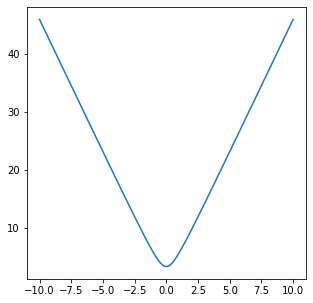

In [60]:
from numpy import linalg as nla

# the null vector
n = np.array([-4, 2, 1, 0])

# add on a multiple and check it's still a solution
mult = 1.

x_p = x_m + mult*n

print(np.allclose(b, A@x_p))


# is x_m the minimum norm solution?

# plot the norm of the vectors we get by adding on multiples of the numm vector
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

mult = np.linspace(-10,10,100)
norms = []
for m in mult:
    print
    norms.append(nla.norm(x_m + m*n))

ax1.plot(mult,norms)

# as we hoped for the norm is at a minimum when the multiplier is zero!

From which we see that if we add any multiple of the null vector to the min norm solution, the value of the norm does indeed increase.

## Homework - A simple mixed determined problem

Consider the problem from the lecture

$$
\begin{pmatrix}
1 & 0 & 0 \\
1 & 0 & 0 \\
0 & 2 & 2 \\
0 & 3 & 3
\end{pmatrix}
\begin{pmatrix}
m_1\\
m_2\\
m_3
\end{pmatrix}
=
\begin{pmatrix}
1\\
2\\
2\\
3
\end{pmatrix}.
$$

Can you come up with a sensible looking "solution" to this problem by considering the under- and over-determined components separately?

Hint: consider two separate problems for: 1) $m_1$ and 2) $m_2$ and $m_3$, and think about what the least squares and minimum norm solution would be for each.

### Solution

Since the two parts of this problem are uncoupled (this won't generally be the case), we can consider solving for $m_1$ separately to $m_2$ and $m_3$ (which are coupled to one another).

The first two equations tell us that

$$m_1 = 1 \qquad \textrm{and} \qquad m_1=2$$

without additional information we could simply take 

$$m_1 = \frac{3}{2}$$

Notice that this does correspond to the least squares solution to this problem. We can check this using the left-inverse $(A^TA)^{-1}A^T$:

$$
  A^T A =
  \begin{pmatrix} 1 \\ 1 \end{pmatrix}^T
  \begin{pmatrix} 1 \\ 1 \end{pmatrix}=
  \begin{pmatrix} 1 & 1 \end{pmatrix}
  \begin{pmatrix} 1 \\ 1 \end{pmatrix}=
  \begin{pmatrix} 2 \end{pmatrix}
$$

and thus

$$
  (A^T A)^{-1} A^T {\bf b}
  =
  \begin{pmatrix}\frac 12\end{pmatrix}
  \begin{pmatrix} 1 \\ 1 \end{pmatrix}^T
  \begin{pmatrix} 1 \\ 2 \end{pmatrix}
  =
  \frac{3}{2}
$$

The second part of the problem tells us that 

$$2m_2 + 2m_3 = 2 \qquad \textrm{and} \qquad 3m_2 + 3m_3 = 3
\qquad \text{ or } \qquad
  \begin{pmatrix} 2 & 2 \\ 3 & 3 \end{pmatrix}
  \begin{pmatrix} m_2 \\ m_3 \end{pmatrix}=
  \begin{pmatrix} 2 \\ 3 \end{pmatrix}$$


but these two just boil down to one equation

$$m_2 + m_3 = 1$$

So for any $\alpha\in \mathbb{R}$, $m_2 = \alpha$ and $m_3 = 1 - \alpha$ is a solution.

We have infinitely many possible solutions. In the lecture we have seen that seeking the minimum norm solution may be a sensible approach (if we know that $\boldsymbol{m}$ is the perturbation from some a priori model guess for example).

Note that we cannot compute the minimum solution using the right-inverse, $(AA^T)^{-1}A$, here because the reduced $2\times 2$ system is still rank-deficient (mixed-determined), and so $AA^T$ is singular.

In this case however, we already know all the solutions to this non-unique problem and can compute its norm as a function $\alpha$ (for simplicity we take the square of the norm here)

$$f(\alpha) = \alpha^2 + (1 - \alpha)^2 =2\alpha^2 - 2\alpha + 1$$

which is just a simple 1d function, which we can minimise by finding its stationary point:

$$\frac{df}{d\alpha} = 4\alpha - 2 = 0$$

and so $\alpha = \tfrac 12$, which gives $m_2=\tfrac 12$ and $m_3=\tfrac 12$.

A sensible solution to this problem could thus be taken to be

$$\boldsymbol{m} = \left(\frac{3}{2} \;\; \frac{1}{2} \;\; \frac{1}{2} \right)^T$$

We will see that this answer agrees with that using the _generalized inverse_ in tomorrow's lecture.